# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Reading in the CSV Files

In [2]:
red_wine = pd.read_csv("winequality-red (1).csv",sep=";")

In [3]:
white_wine = pd.read_csv("winequality-white (1).csv",sep=";")

# Cleaning up of data & Exploratory Data Analysis

In [4]:
red_wine.shape

(1599, 12)

In [5]:
white_wine.shape

(4898, 12)

#### Identifying of nulls and duplicated observations

In [6]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
red_wine.duplicated().sum()

240

In [9]:
white_wine.duplicated().sum()

937

In [10]:
#i do not remove duplicates

In [11]:
#red_wine.drop_duplicates(keep='first',inplace=True) #Drop duplicates except for first occurrence

In [12]:
#white_wine.drop_duplicates(keep='first',inplace=True) #Drop duplicates except for first occurrence

#### Shape & data types

In [13]:
red_wine.shape

(1599, 12)

In [14]:
white_wine.shape

(4898, 12)

In [15]:
red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Summary statistics & number of unique values

In [17]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [19]:
red_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [20]:
white_wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

# We will focus our analysis on white wine dataset from this point on since there are only 1,359 observations in the red wine dataset

#### Breakdown on observations in each white wine quality

In [21]:
white_wine.groupby("quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


#### Removing outliers from the dataset using IQR

In [22]:
# Breakdown the dataset into subsets by the wine quality
white_wine_quality_3=white_wine[white_wine["quality"]==3]
white_wine_quality_4=white_wine[white_wine["quality"]==4]
white_wine_quality_5=white_wine[white_wine["quality"]==5]
white_wine_quality_6=white_wine[white_wine["quality"]==6]
white_wine_quality_7=white_wine[white_wine["quality"]==7]
white_wine_quality_8=white_wine[white_wine["quality"]==8]
white_wine_quality_9=white_wine[white_wine["quality"]==9]

In [23]:
#using IQR formula to get rid of outliers
Q1 = white_wine_quality_3.quantile(0.25)
Q3 = white_wine_quality_3.quantile(0.75)
IQR = Q3 - Q1
white_wine_quality_3 = white_wine_quality_3[~((white_wine_quality_3 < (Q1 - 1.5 * IQR)) |(white_wine_quality_3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
#reference for quality 3
Q3

fixed acidity             8.525000
volatile acidity          0.412500
citric acid               0.385000
residual sugar           10.700000
chlorides                 0.054000
free sulfur dioxide      47.500000
total sulfur dioxide    210.000000
density                   0.996922
pH                        3.325000
sulphates                 0.542500
alcohol                  11.000000
quality                   3.000000
Name: 0.75, dtype: float64

In [25]:
#reference for quality 3
Q1

fixed acidity             6.57500
volatile acidity          0.23750
citric acid               0.25750
residual sugar            1.58750
chlorides                 0.03625
free sulfur dioxide      13.25000
total sulfur dioxide    105.75000
density                   0.99252
pH                        3.03500
sulphates                 0.38000
alcohol                   9.55000
quality                   3.00000
Name: 0.25, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x115019048>],
 'caps': [<matplotlib.lines.Line2D at 0x114ff0be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11598b400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114ff0438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x115019160>,
  <matplotlib.lines.Line2D at 0x115013f60>]}

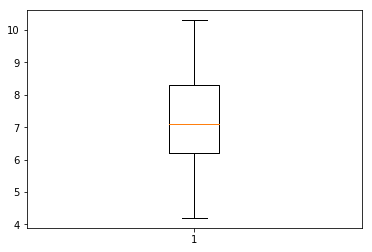

In [26]:
plt.boxplot(white_wine_quality_3['fixed acidity'])

In [26]:
Q1 = white_wine_quality_4.quantile(0.25)
Q3 = white_wine_quality_4.quantile(0.75)
IQR = Q3 - Q1
white_wine_quality_4 = white_wine_quality_4[~((white_wine_quality_4 < (Q1 - 1.5 * IQR)) |(white_wine_quality_4 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
Q1 = white_wine_quality_5.quantile(0.25)
Q3 = white_wine_quality_5.quantile(0.75)
IQR = Q3 - Q1
white_wine_quality_5 = white_wine_quality_5[~((white_wine_quality_5 < (Q1 - 1.5 * IQR)) |(white_wine_quality_5 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
Q1 = white_wine_quality_6.quantile(0.25)
Q3 = white_wine_quality_6.quantile(0.75)
IQR = Q3 - Q1
white_wine_quality_6 = white_wine_quality_6[~((white_wine_quality_6 < (Q1 - 1.5 * IQR)) |(white_wine_quality_6 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
Q1 = white_wine_quality_7.quantile(0.25)
Q3 = white_wine_quality_7.quantile(0.75)
IQR = Q3 - Q1
white_wine_quality_7 = white_wine_quality_7[~((white_wine_quality_7 < (Q1 - 1.5 * IQR)) |(white_wine_quality_7 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
Q1 = white_wine_quality_8.quantile(0.25)
Q3 = white_wine_quality_8.quantile(0.75)
IQR = Q3 - Q1
white_wine_quality_8 = white_wine_quality_8[~((white_wine_quality_8 < (Q1 - 1.5 * IQR)) |(white_wine_quality_8 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
Q1 = white_wine_quality_9.quantile(0.25)
Q3 = white_wine_quality_9.quantile(0.75)
IQR = Q3 - Q1
white_wine_quality_9 = white_wine_quality_9[~((white_wine_quality_9 < (Q1 - 1.5 * IQR)) |(white_wine_quality_9 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
# Check the shape of each dataset after removing outliers before concatenating the datasets
print(white_wine_quality_3.shape)
print(white_wine_quality_4.shape)
print(white_wine_quality_5.shape)
print(white_wine_quality_6.shape)
print(white_wine_quality_7.shape)
print(white_wine_quality_8.shape)
print(white_wine_quality_9.shape)

(13, 12)
(126, 12)
(1101, 12)
(1827, 12)
(719, 12)
(134, 12)
(2, 12)


In [33]:
dataframes = [white_wine_quality_3,white_wine_quality_4,white_wine_quality_5,white_wine_quality_6,white_wine_quality_7,white_wine_quality_8,white_wine_quality_9]

In [34]:
white_wine_final = pd.concat(dataframes) # Concat the datasets

In [35]:
white_wine_final.shape # Dropped 800 outliers

(3922, 12)

#### Correlation Heatmap

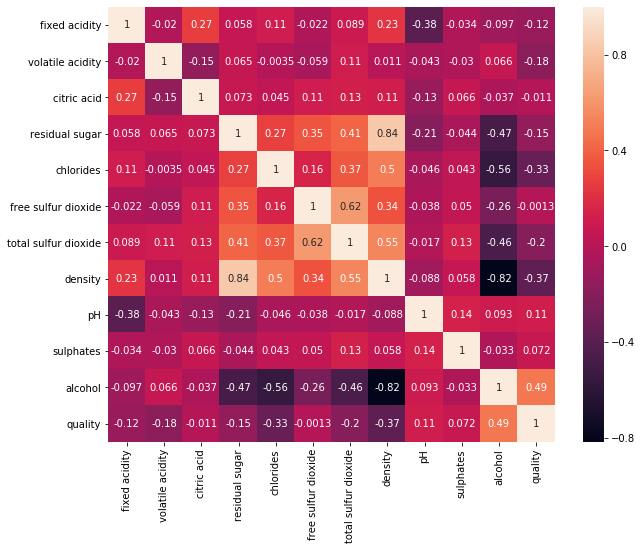

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(white_wine_final.corr(), annot=True)
plt.show()

#### Linear Regression with all the features

In [37]:
X = white_wine_final.drop("quality",1)   #Feature Matrix
y = white_wine_final["quality"]          #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 888)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#plt.scatter(y_test,predictions)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')

#Validation (mesuring accuracy)
print('R-square:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R-square: 0.3070479983340275
MAE: 0.5580093651807152
MSE: 0.5129638407918536
RMSE: 0.7162149403578884


#### Conduct feature selection (backward elimination) to determine best set of features

In [38]:
X = white_wine_final.drop("quality",1)   #Feature Matrix
y = white_wine_final["quality"]          #Target Variable

In [39]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


C:\Users\Darren\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Linear Regression with the best set of features

In [40]:
X = X[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 888)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#plt.scatter(y_test,predictions)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')
print('R-square:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R-square: 0.30722463782817844
MAE: 0.5581819268328541
MSE: 0.51283308184587
RMSE: 0.7161236498300206


#### K Nearest Neighbors

In [41]:
X = white_wine_final.drop("quality",1)   #Feature Matrix
y = white_wine_final["quality"]          #Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

In [42]:
# Try KNN with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6063694267515923


In [43]:
# Finding optimal number of neighbors
accuracy = [] # Store the accuracy of KNN for each k
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print("Neighbors:", i, ":", metrics.accuracy_score(y_test,y_pred))

Neighbors: 1 : 0.6063694267515923
Neighbors: 2 : 0.5261146496815287
Neighbors: 3 : 0.532484076433121
Neighbors: 4 : 0.5312101910828025
Neighbors: 5 : 0.5197452229299363
Neighbors: 6 : 0.5248407643312102
Neighbors: 7 : 0.532484076433121
Neighbors: 8 : 0.510828025477707
Neighbors: 9 : 0.5019108280254777
Neighbors: 10 : 0.5146496815286624
Neighbors: 11 : 0.5019108280254777
Neighbors: 12 : 0.5082802547770701
Neighbors: 13 : 0.5095541401273885
Neighbors: 14 : 0.5197452229299363
Neighbors: 15 : 0.5210191082802548
Neighbors: 16 : 0.513375796178344
Neighbors: 17 : 0.5070063694267516
Neighbors: 18 : 0.5095541401273885
Neighbors: 19 : 0.5019108280254777
Neighbors: 20 : 0.5070063694267516


In [45]:
accuracy_df = pd.DataFrame(accuracy,columns = ["Accuracy"],index=range(1,21))

In [46]:
accuracy_df

,Accuracy
1,0.606369
2,0.526115
3,0.532484
4,0.531210
5,0.519745
6,0.524841
7,0.532484
8,0.510828
9,0.501911
10,0.514650


In [47]:
accuracy_df.idxmax() # The optimal number for k is 1 with the accuracy of 0.606

Accuracy    1
dtype: int64

In [48]:
accuracy_df.max()

Accuracy    0.606369
dtype: float64

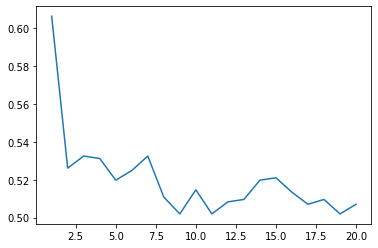

In [49]:
plt.plot(accuracy_df)

#### Random Forest

In [50]:
X = white_wine_final.drop("quality",1)   #Feature Matrix
y = white_wine_final["quality"]          #Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True)
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
# Actual class predictions
rf_predictions = model.predict(X_test)

In [53]:
#plt.scatter(y_test,predictions)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')
print('R-square:', metrics.r2_score(y_test, rf_predictions))
print('MAE:', metrics.mean_absolute_error(y_test, rf_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rf_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))

R-square: 0.4682527851703109
MAE: 0.3248407643312102
MSE: 0.39363057324840767
RMSE: 0.6273998511702148
